# Credit default prediction

**Group 9**

**Author: Li Jiadong**

**Student ID: 2101212916**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
import time
import warnings
warnings.filterwarnings('ignore')
pd.set_option('expand_frame_repr', False) 
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 120)

# Contents
---------------------

**3  Data feature and preprocess**

3.1  Read the original data

3.2  Fill the missing values according to the situation

3.3  SMOTE oversampling

---------------------
**4  Logistic Regression**

4.1  Feature selection: WOE value and IV value

4.2  Predicted results

4.3  ROC curve

---------------------
**5  Decision Tree**

5.1  Model building

5.2  Predicted results

5.3  The importance of feature factors

5.4  ROC curve

---------------------
**6  Random Forest**

6.1  Model building

6.2  Predicted results

6.3  The importance of feature factors

6.4  ROC curve

---------------------
**7  XGBoost**

7.1  Model building

7.2  Predicted results

7.3  The importance of feature factors

7.4  ROC curve

---------------------
**8  Results summary**

---------------------

# Data feature and preprocess

## Read the original data

In [29]:
training_data = pd.read_csv('training.csv',index_col=['id'])
training_data = training_data.iloc[:, :-1]
training_data

,event,var1,var2,var3,var4,var5,var6,var7,var8
id,,,,,,,,,
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1.0,2.096510e+07,NaN,NaN,NaN,NaN,NaN,62.750000
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
238831,1,1.0,6.523118e+04,NaN,NaN,NaN,NaN,NaN,58.916667
238832,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238833,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**By observing the original dataset, it can be seen that many variables in the sample (including variables 1 to 8) are null values**

In [30]:
test_data = pd.read_csv('test.csv',index_col=['id'])
test_data = test_data.iloc[:, :-1]
test_data

,event,var1,var2,var3,var4,var5,var6,var7,var8
id,,,,,,,,,
0,1,1.0,9.248254e+07,0.908051,13.0,0.133592,0.027241,NaN,73.041667
1,1,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
2,1,1.0,6.718715e+06,7.035461,13.0,41.878073,-7.422937,NaN,76.250000
3,1,1.0,3.576348e+06,0.483255,13.0,60.801780,NaN,NaN,80.083333
4,1,1.0,8.443072e+06,NaN,NaN,0.525225,NaN,NaN,87.625000
...,...,...,...,...,...,...,...,...,...
59704,1,1.0,1.060430e+06,NaN,NaN,NaN,NaN,NaN,NaN
59705,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59706,1,1.0,1.593264e+07,NaN,NaN,NaN,NaN,NaN,NaN


## Fill the missing values according to the situation

**To begin with, delete the samples with severe missing values**

In [31]:
# Delete samples with missing values greater than or equal to 4
training_data = training_data.dropna(thresh=5)
training_data

,event,var1,var2,var3,var4,var5,var6,var7,var8
id,,,,,,,,,
11,1,2.0,7.522327e+06,1.163336,13.0,NaN,NaN,NaN,45.375000
12,1,1.0,5.661878e+05,0.646621,13.0,NaN,NaN,NaN,53.083333
14,1,13.0,8.810127e+03,NaN,13.0,NaN,NaN,24.0,58.250000
15,1,1.0,1.194820e+06,NaN,NaN,4.893348,0.016672,NaN,68.500000
18,1,1.0,8.041781e+05,4.453691,13.0,NaN,NaN,24.0,71.333333
...,...,...,...,...,...,...,...,...,...
238821,1,1.0,2.401630e+06,2.188121,13.0,NaN,NaN,NaN,43.750000
238823,1,1.0,NaN,NaN,NaN,210.209482,2.428439,NaN,78.666667
238825,1,1.0,7.391670e+02,0.513215,13.0,NaN,NaN,NaN,NaN


In [32]:
test_data = test_data.dropna(thresh=5)
test_data

,event,var1,var2,var3,var4,var5,var6,var7,var8
id,,,,,,,,,
0,1,1.0,9.248254e+07,0.908051,13.0,0.133592,0.027241,NaN,73.041667
2,1,1.0,6.718715e+06,7.035461,13.0,41.878073,-7.422937,NaN,76.250000
3,1,1.0,3.576348e+06,0.483255,13.0,60.801780,NaN,NaN,80.083333
4,1,1.0,8.443072e+06,NaN,NaN,0.525225,NaN,NaN,87.625000
5,1,1.0,1.094394e+05,2.120851,13.0,NaN,NaN,NaN,75.166667
...,...,...,...,...,...,...,...,...,...
59215,1,1.0,2.702004e+04,NaN,NaN,NaN,NaN,24.0,44.166667
59256,1,1.0,2.712359e+06,NaN,NaN,3.728088,0.023526,NaN,NaN
59532,1,1.0,4.139835e+06,NaN,NaN,NaN,NaN,21.0,73.166667


**View current dataset**

In [33]:
training_data.describe()

,event,var1,var2,var3,var4,var5,var6,var7,var8
count,67395.000000,66853.000000,6.583800e+04,40607.000000,55367.000000,6402.000000,5010.000000,23652.000000,58372.000000
mean,0.977817,2.118648,4.132497e+06,12.281068,11.732548,213.620354,33.502923,20.605911,55.985438
std,0.147278,4.085503,2.031986e+07,91.655524,3.246253,1203.272804,2322.661789,6.504308,11.451396
min,0.000000,1.000000,0.000000e+00,0.000000,1.000000,0.000000,-3127.163978,2.000000,24.416667
25%,1.000000,1.000000,1.138067e+05,0.352101,13.000000,2.528815,0.009771,21.000000,47.250000
50%,1.000000,1.000000,6.801685e+05,1.303507,13.000000,9.211183,0.293631,24.000000,55.750000
75%,1.000000,1.000000,2.499252e+06,5.260387,13.000000,54.603545,1.382450,24.000000,64.083333
max,1.000000,121.000000,1.590072e+09,9684.426685,13.000000,32102.400000,164300.400000,24.000000,107.416667


In [34]:
test_data.describe()

,event,var1,var2,var3,var4,var5,var6,var7,var8
count,16818.000000,16679.000000,1.645600e+04,10086.000000,13767.000000,1671.000000,1306.000000,5883.000000,14577.000000
mean,0.978892,2.120031,4.419590e+06,12.629308,11.775187,246.496799,3.932741,20.623151,55.993839
std,0.143750,4.060991,2.569588e+07,104.239296,3.194267,2532.376101,89.611793,6.479554,11.554598
min,0.000000,1.000000,0.000000e+00,0.000000,1.000000,0.001175,-391.786290,2.000000,24.500000
25%,1.000000,1.000000,1.152902e+05,0.349755,13.000000,2.323323,0.002228,21.000000,47.083333
50%,1.000000,1.000000,7.250760e+05,1.293020,13.000000,8.702009,0.225029,24.000000,55.833333
75%,1.000000,1.000000,2.627209e+06,5.155394,13.000000,55.095088,1.278787,24.000000,64.208333
max,1.000000,111.000000,1.590072e+09,8615.982450,13.000000,93553.900000,2978.800000,24.000000,99.416667


**According to the descriptive statistical results, we can see that after deleting samples with missing values greater than or equal to 4, variables 5, 6, and 7 still have a large number of missing values** 

**Therefore, this study used the KNN algorithm to fill in the missing values instead of using the mean values of the variables**

**KNNImputer fills in missing values by finding the mean value of the closest samples**

![alt text](KNN.png)

**Before using KNNImputer, we need to standardize the data first**

In [61]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
training_data.iloc[:,1:] = scaler.fit_transform(training_data.iloc[:,1:])
test_data.iloc[:,1:] = scaler.fit_transform(test_data.iloc[:,1:])
test_data

,event,var1,var2,var3,var4,var5,var6,var7,var8
id,,,,,,,,,
0,1,-0.275811,3.427227,-0.112451,0.383455,-0.097315,-0.043599,NaN,1.475466
2,1,-0.275811,0.089477,-0.053666,0.383455,-0.080825,-0.126769,NaN,1.753142
3,1,-0.275811,-0.032817,-0.116527,0.383455,-0.073350,NaN,NaN,2.084912
4,1,-0.275811,0.156586,NaN,NaN,-0.097160,NaN,NaN,2.737633
5,1,-0.275811,-0.167742,-0.100816,0.383455,NaN,NaN,NaN,1.659381
...,...,...,...,...,...,...,...,...,...
59215,1,-0.275811,-0.170950,NaN,NaN,NaN,NaN,0.521199,-1.023625
59256,1,-0.275811,-0.066442,NaN,NaN,-0.095895,-0.043641,NaN,NaN
59532,1,-0.275811,-0.010887,NaN,NaN,NaN,NaN,0.058165,1.486284


In [62]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)

imputed = imputer.fit_transform(training_data)
training_data_fill = pd.DataFrame(imputed, columns=training_data.columns)

imputed = imputer.fit_transform(test_data)
test_data_fill = pd.DataFrame(imputed, columns=test_data.columns)

In [64]:
training_data_fill.to_pickle('./training_data_fill.pkl')

In [65]:
test_data_fill.to_pickle('./test_data_fill.pkl')

In [34]:
training_data_fill = pd.read_pickle('training_data_fill.pkl')
test_data_fill = pd.read_pickle('test_data_fill.pkl')

**View data after filling the missing values**

In [35]:
training_data_fill.describe()

,event,var1,var2,var3,var4,var5,var6,var7,var8
count,67395.000000,67395.000000,67395.000000,67395.000000,67395.000000,67395.000000,67395.000000,67395.000000,67395.000000
mean,0.977817,0.000489,0.003640,0.437126,0.027525,0.259151,0.105117,0.112901,0.064450
std,0.147278,0.996997,0.994737,1.662972,0.923623,0.651502,0.944468,0.652313,0.956546
min,0.000000,-0.273811,-0.203374,-0.133993,-3.306164,-0.177547,-1.360931,-2.860612,-2.756786
25%,1.000000,-0.273811,-0.197481,-0.124889,0.390439,-0.161891,-0.014289,0.014466,-0.646399
50%,1.000000,-0.273811,-0.168154,-0.081483,0.390439,-0.071763,-0.013830,0.337336,0.124984
75%,1.000000,-0.273811,-0.074967,0.143348,0.390439,0.905458,-0.013677,0.521833,0.721714
max,1.000000,29.098560,78.049339,105.528443,0.390439,26.503774,70.730614,0.521833,4.491301


In [36]:
test_data_fill.describe()

,event,var1,var2,var3,var4,var5,var6,var7,var8
count,16818.000000,16818.000000,16818.000000,16818.000000,16818.000000,16818.000000,16818.000000,16818.000000,16818.000000
mean,0.978892,0.001139,0.000634,0.435173,0.015818,-0.061817,0.001853,0.066928,0.067776
std,0.143750,0.997289,0.990432,1.319494,0.919182,0.318829,0.296253,0.660943,0.956559
min,0.000000,-0.275811,-0.172001,-0.121163,-3.373412,-0.097367,-4.417617,-2.874385,-2.725748
25%,1.000000,-0.275811,-0.167304,-0.113214,0.383455,-0.092726,-0.040491,-0.080746,-0.648581
50%,1.000000,-0.275811,-0.142522,-0.073155,0.383455,-0.087954,0.015589,0.243378,0.144781
75%,1.000000,-0.275811,-0.065335,0.164056,0.383455,-0.059735,0.028738,0.521199,0.718648
max,1.000000,26.811986,61.710307,82.538735,0.383455,36.856822,33.209991,0.521199,3.758185


**It can be seen that the mean of the variable 'event' is very close to 1, so it's suspected that there is a problem of sample imbalance in the dataset, which means that most of the values of the variable 'event' is equal to 1**

## SMOTE oversampling

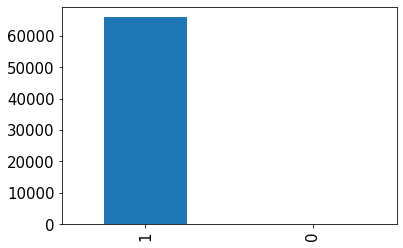

In [37]:
bins = pd.cut(training_data_fill['event'],[0,0.5,1], labels=[u"0",u"1"])
bins_values = bins.value_counts()
bins_values.plot.bar()

In [38]:
# Extract feature variables and assign them to variable X_train, extract the target variable and assign it to variable y_train
X_train = training_data_fill.drop(columns='event')
y_train = training_data_fill['event']

# Use the Counter() method to count the target variable:
from collections import Counter
Counter(y_train)

Counter({1.0: 65900, 0.0: 1495})

Due to the large difference in the number of samples of **different categories** in the data set, the prediction results will be **biased**. 

Therefore, we need to manually **increase** the number of samples of less categories to solve the problem of sample imbalance.

The simplest oversampling method is to replicate a small number of samples, but this method is prone to the **overfitting** problem 

Therefore, I use **SMOTE** method, which can better solve this problem

The specific steps of the **SMOTE** method are as follows：

1、According to the different samples, it can be divided into two categories: large quantity and small quantity

2、Randomly select a sample point from the small quantity

3、Find the six sample points closest to the sample point selected in step 2

4、The sample points selected in step 2 are connected to the six sample points selected in step 3, and another six points are randomly selected on these six lines to generate new sample points.

![alt text](SMOTE.png)

In [39]:
# Conduct SMOTE oversampling:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Use Counter() method to test the effect of SMOTE oversampling
Counter(y_train)

Counter({1.0: 65900, 0.0: 65900})

# Logistic Regression

## Feature selection: WOE value and IV value

![WOE](WOE.png)

In [21]:
train_data= X_train
train_data['event'] = y_train
train_data

,var1,var2,var3,var4,var5,var6,var7,var8,event
0,-0.029042,0.166825,-0.121301,0.390439,-0.167962,-0.014077,-0.262280,-0.926571,1.0
1,-0.273811,-0.175510,-0.126938,0.390439,0.906035,-0.013736,-0.031658,-0.253430,1.0
2,2.663426,-0.202940,0.321404,0.390439,-0.089983,-0.014127,0.521833,0.197756,1.0
3,-0.273811,-0.144573,-0.068275,0.390439,-0.173480,-0.014419,0.152839,1.092851,1.0
4,-0.273811,-0.163798,-0.085401,0.390439,0.972156,-0.011726,0.521833,1.340276,1.0
...,...,...,...,...,...,...,...,...,...
131795,1.737298,-0.179318,-0.127435,0.390439,-0.108861,-0.013491,0.521833,-0.875933,0.0
131796,-0.273811,-0.193164,-0.114249,-1.162611,-0.123405,-0.012305,0.521833,-0.560338,0.0
131797,-0.273811,-0.201822,-0.113781,-0.661430,-0.098516,-0.014353,0.521833,-0.022154,0.0
131798,-0.273811,-0.159998,-0.119829,-3.306164,0.107107,-0.014818,-0.132020,0.384044,0.0


In [10]:
def cal_iv(data, cut_num, feature, target):
    
    # 1. Data distribution box
    data_cut = pd.cut(data[feature], cut_num)

    # 2. Count the total number of samples in each sub box, the number of bad samples, and the number of good samples
    cut_group_all = data[target].groupby(data_cut).count()  
    cut_y = data[target].groupby(data_cut).sum()  
    cut_n = cut_group_all - cut_y 
    
    # Summarize the data
    df = pd.DataFrame() 
    df['all_sample'] = cut_group_all
    df['bad_sample'] = cut_y
    df['good_sample'] = cut_n

    # 3. Count bad sample% and good sample%
    df['bad_sample%'] = df['bad_sample'] / df['bad_sample'].sum()
    df['good_sample%'] = df['good_sample'] / df['good_sample'].sum()

    # 4.Calculate WOE value
    df['WOE'] = np.log(df['bad_sample%'] / df['good_sample%'])
    df = df.replace({'WOE': {np.inf: 0, -np.inf: 0}}) 

    # 5.Calculate the IV value of each sub box
    df['IV'] = df['WOE'] * (df['bad_sample%'] - df['good_sample%'])

    # 6.Summarize the IV values of each sub box to obtain the IV value of the variable
    iv = df['IV'].sum()
    
    print(iv)

In [11]:
for i in train_data.columns[:-1]:
    print('The IV value of ' + i + ' is:')
    cal_iv(train_data, 4, i, 'event')  

The IV value of var1 is:
0.061540819678581854
The IV value of var2 is:
0.0010419139299917386
The IV value of var3 is:
1.1283616509181679e-08
The IV value of var4 is:
1.6268918441647244
The IV value of var5 is:
2.072862773261943e-07
The IV value of var6 is:
2.3026740459068225e-10
The IV value of var7 is:
0.18545861366252034
The IV value of var8 is:
0.09171490374234313


![jupyter](./IV.png)

The IV value of **var1** is:
0.061540819678581854

The IV value of **var4** is:
1.6268918441647244

The IV value of **var7** is:
0.18545861366252034

The IV value of **var8** is:
0.09171490374234313

In [22]:
X_train_LG = X_train[['var1','var4','var7','var8']]
X_train_LG

,var1,var4,var7,var8
0,-0.029042,0.390439,-0.262280,-0.926571
1,-0.273811,0.390439,-0.031658,-0.253430
2,2.663426,0.390439,0.521833,0.197756
3,-0.273811,0.390439,0.152839,1.092851
4,-0.273811,0.390439,0.521833,1.340276
...,...,...,...,...
131795,1.737298,0.390439,0.521833,-0.875933
131796,-0.273811,-1.162611,0.521833,-0.560338
131797,-0.273811,-0.661430,0.521833,-0.022154
131798,-0.273811,-3.306164,-0.132020,0.384044


In [23]:
# Extract feature variables and assign them to variable X_train, extract the target variable and assign it to variable y_train
X_test = test_data_fill[['var1','var4','var7','var8']]
y_test = test_data_fill['event']
X_test

,var1,var4,var7,var8
0,-0.275811,0.383455,-1.083986,1.475466
1,-0.275811,0.383455,0.058165,1.753142
2,-0.275811,0.383455,0.305116,2.084912
3,-0.275811,0.383455,0.335985,2.737633
4,-0.275811,0.383455,-0.497476,1.659381
...,...,...,...,...
16813,-0.275811,0.383455,0.521199,-1.023625
16814,-0.275811,0.383455,-0.065311,-0.238197
16815,-0.275811,0.383455,0.058165,1.486284
16816,-0.275811,0.132997,0.521199,0.000533


## Predicted results

In [93]:
perf_all = pd.DataFrame(dtype = float, columns = ['Accuracy', 'Precision', 'Recall', 'F1', 'Auc'])

In [24]:
# Logical model construction
from sklearn.linear_model import LogisticRegression
LG_model = LogisticRegression()
LG_model.fit(X_train_LG, y_train)

# Prediction
y_pred = LG_model.predict(X_test)

In [30]:
# View the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print('Accuracy: %.3f' % LG_model.score(X_test, y_test))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1: %.3f' % f1_score(y_test, y_pred))
print('Auc: %.3f' % roc_auc_score(y_test, y_pred))

Accuracy: 0.874
Precision: 0.992
Recall: 0.878
F1: 0.931
Auc: 0.777


In [94]:
perf_all.at['Logistic regression','Accuracy'] = 0.874
perf_all.at['Logistic regression','Precision'] = 0.992
perf_all.at['Logistic regression','Recall'] = 0.878
perf_all.at['Logistic regression','F1'] = 0.931
perf_all.at['Logistic regression','Auc'] = 0.777
perf_all

,Accuracy,Precision,Recall,F1,Auc
Logistic regression,0.874,0.992,0.878,0.931,0.777


## ROC curve

In [16]:
# Predicted the probability
y_pred_proba = LG_model.predict_proba(X_test)  

In [17]:
y_pred_proba

array([[0.16917791, 0.83082209],
       [0.12897874, 0.87102126],
       [0.1082834 , 0.8917166 ],
       ...,
       [0.1439528 , 0.8560472 ],
       [0.28467839, 0.71532161],
       [0.73690814, 0.26309186]])

In [18]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(y_test, y_pred) 
matrix = pd.DataFrame(m, index=['0（Actual no loss）', '1（Actual loss）'], columns=['0（Predict no loss）', '1（Predict loss）'])
matrix

,0（Predict no loss）,1（Predict loss）
0（Actual no loss）,240,115
1（Actual loss）,2011,14452


In [19]:
# 1.Calculate the false predict rate (fpr), target predict rate (tpr), and threshold required for the ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, y_pred_proba[:,1])

In [20]:
# 2.View the fpr, tpr, thres
importances_df = pd.DataFrame()
importances_df['Threshold'] = list(thres)
importances_df['False predict rate'] = list(fpr)
importances_df['Target predict rate'] = list(tpr)
importances_df

,Threshold,False predict rate,Target predict rate
0,1.944291,0.000000,0.000000
1,0.944291,0.000000,0.000061
2,0.926825,0.000000,0.001215
3,0.926583,0.000000,0.001336
4,0.916350,0.000000,0.002430
...,...,...,...
3860,0.017573,0.983099,0.999879
3861,0.010682,0.991549,0.999879
3862,0.010347,0.991549,0.999939
3863,0.008515,1.000000,0.999939


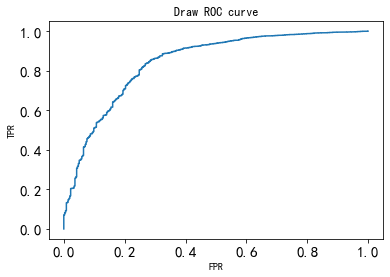

In [21]:
# 3.Draw ROC curve
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.plot(fpr, tpr)  
plt.title('Draw ROC curve')  
plt.xlabel('FPR')  
plt.ylabel('TPR')  
plt.show()

# Decision Tree

## Model building

In [78]:
# Extract feature variables and assign them to variable X_test, extract the target variable and assign it to variable y_test
X_test = test_data_fill.drop(columns='event')
y_test = test_data_fill['event']

In [83]:
# Fitting training set using random forest model
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, random_state=1)
DT_model.fit(X_train, y_train)

# Prediction
y_pred = DT_model.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.8949339992864788


**Grid search**

In [85]:
# Use the grid search to find the appropriate hyperparameter
from sklearn.model_selection import GridSearchCV 

# Specify the range of parameters in the classifier
parameters = {'max_depth':[2, 3, 4, 5], 'min_samples_leaf':[5, 10, 20, 30]}
new_model = DecisionTreeClassifier(random_state=1)  
grid_search = GridSearchCV(new_model, parameters, cv=5, scoring='accuracy') 

grid_search.fit(X_train, y_train)  
# The optimal value of the parameters
grid_search.best_params_  

{'max_depth': 5, 'min_samples_leaf': 5}

In [86]:
# Fitting training set using decision tree model
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=1)
DT_model.fit(X_train, y_train)

# Prediction
y_pred = DT_model.predict(X_test)

## Predicted results

In [87]:
# View the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print('Accuracy: %.3f' % DT_model.score(X_test, y_test))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1: %.3f' % f1_score(y_test, y_pred))
print('Auc: %.3f' % roc_auc_score(y_test, y_pred))

Accuracy: 0.887
Precision: 0.989
Recall: 0.895
F1: 0.940
Auc: 0.712


In [95]:
perf_all.at['Decision tree model','Accuracy'] = 0.887
perf_all.at['Decision tree model','Precision'] = 0.989
perf_all.at['Decision tree model','Recall'] = 0.895
perf_all.at['Decision tree model','F1'] = 0.940
perf_all.at['Decision tree model','Auc'] = 0.712
perf_all

,Accuracy,Precision,Recall,F1,Auc
Logistic regression,0.874,0.992,0.878,0.931,0.777
Decision tree model,0.887,0.989,0.895,0.940,0.712


## The importance of feature factors

In [89]:
DT_model.feature_importances_

array([0.09187934, 0.00351938, 0.05730709, 0.44413869, 0.14711128,
       0.23621302, 0.00140787, 0.01842333])

In [90]:
# Display features and their importance:
features = X_train.columns  
importances = DT_model.feature_importances_
importances_df = pd.DataFrame()
importances_df['Features'] = features
importances_df['Importance of Features'] = importances
importances_df = importances_df.sort_values('Importance of Features', ascending=False)
importances_df

,Features,Importance of Features
3,var4,0.444139
5,var6,0.236213
4,var5,0.147111
0,var1,0.091879
2,var3,0.057307
7,var8,0.018423
1,var2,0.003519
6,var7,0.001408


## ROC curve

In [91]:
# Predicted the probability
y_pred_proba = DT_model.predict_proba(X_test)

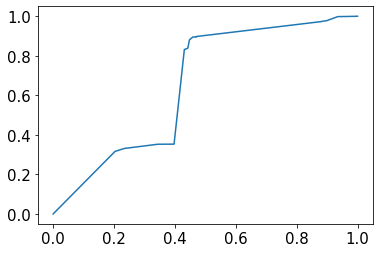

In [92]:
# Draw ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, y_pred_proba[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show()

# Random Forest

## Model building

In [40]:
# Extract feature variables and assign them to variable X_test, extract the target variable and assign it to variable y_test
X_test = test_data_fill.drop(columns='event')
y_test = test_data_fill['event']

In [41]:
# Fitting training set using random forest model
from sklearn.ensemble import RandomForestClassifier 
RF_model = RandomForestClassifier(max_depth=2, n_estimators=60, min_samples_leaf=4, random_state=1)
RF_model.fit(X_train, y_train)

# Prediction
y_pred = RF_model.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.7422999167558568


**Grid search**

In [126]:
# Use the grid search to find the appropriate hyperparameter
from sklearn.model_selection import GridSearchCV 

# Specify the range of parameters in the classifier
parameters = {'n_estimators':[5, 10, 20], 'max_depth':[2, 3, 4, 5], 'min_samples_leaf':[5, 10, 20, 30]}
new_model = RandomForestClassifier(random_state=1)  
grid_search = GridSearchCV(new_model, parameters, cv=5, scoring='accuracy') 

grid_search.fit(X_train, y_train)  
# The optimal value of the parameters
grid_search.best_params_  

{'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 20}

In [50]:
# Fitting training set using random forest model
from sklearn.ensemble import RandomForestClassifier 
RF_model = RandomForestClassifier(max_depth=5, n_estimators=20, min_samples_leaf=5, random_state=1)
RF_model.fit(X_train, y_train)

# Prediction
y_pred = RF_model.predict(X_test)

## Predicted results

In [44]:
# View the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print('Accuracy: %.3f' % RF_model.score(X_test, y_test))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1: %.3f' % f1_score(y_test, y_pred))
print('Auc: %.3f' % roc_auc_score(y_test, y_pred))

Accuracy: 0.842
Precision: 0.990
Recall: 0.847
F1: 0.913
Auc: 0.732


In [96]:
perf_all.at['Random forest model','Accuracy'] = 0.842
perf_all.at['Random forest model','Precision'] = 0.990
perf_all.at['Random forest model','Recall'] = 0.847
perf_all.at['Random forest model','F1'] = 0.913
perf_all.at['Random forest model','Auc'] = 0.732
perf_all

,Accuracy,Precision,Recall,F1,Auc
Logistic regression,0.874,0.992,0.878,0.931,0.777
Decision tree model,0.887,0.989,0.895,0.940,0.712
Random forest model,0.842,0.990,0.847,0.913,0.732


## The importance of feature factors

In [129]:
RF_model.feature_importances_

array([0.06111887, 0.03628939, 0.12882004, 0.30583995, 0.22667044,
       0.1836513 , 0.00817684, 0.04943317])

In [133]:
# Display features and their importance:
features = X_train.columns  
importances = RF_model.feature_importances_
importances_df = pd.DataFrame()
importances_df['Features'] = features
importances_df['Importance of Features'] = importances
importances_df = importances_df.sort_values('Importance of Features', ascending=False)
importances_df

,Features,Importance of Features
3,var4,0.305840
4,var5,0.226670
5,var6,0.183651
2,var3,0.128820
0,var1,0.061119
7,var8,0.049433
1,var2,0.036289
6,var7,0.008177


## ROC curve

In [52]:
# Predicted the probability
y_pred_proba = RF_model.predict_proba(X_test)

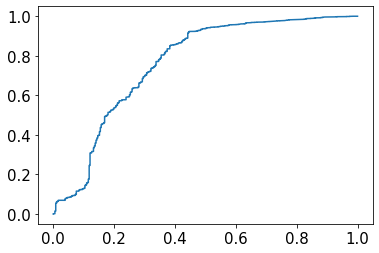

In [53]:
# Draw ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, y_pred_proba[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show()

# XGBoost

## Model building

In [97]:
# Extract feature variables and assign them to variable X_test, extract the target variable and assign it to variable y_test
X_test = test_data_fill.drop(columns='event')
y_test = test_data_fill['event']

In [65]:
# Model training using XGBoost classifier
from xgboost import XGBClassifier
XG_model = XGBClassifier(n_estimators=150, learning_rate=0.05)
XG_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [66]:
# Prediction
y_pred = XG_model.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.9416101795695089

**Grid search**

In [102]:
from sklearn.model_selection import GridSearchCV  
# Specify the range of parameters in the classifier
parameters = {'max_depth': [1, 3, 5], 'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]}
XG_model = XGBClassifier()  
grid_search = GridSearchCV(XG_model, parameters, scoring='accuracy', cv=5)  

In [103]:
grid_search.fit(X_train, y_train)  
# The optimal value of the parameters
grid_search.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}

In [104]:
# Rebuild XGBoost classifier based on new parameter
XG_model = XGBClassifier(max_depth=5, n_estimators=150, learning_rate=0.2)
XG_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [105]:
# Prediction
y_pred = XG_model.predict(X_test)

## Predicted results

In [106]:
# View the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print('Accuracy: %.3f' % XG_model.score(X_test, y_test))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1: %.3f' % f1_score(y_test, y_pred))
print('Auc: %.3f' % roc_auc_score(y_test, y_pred))

Accuracy: 0.932
Precision: 0.986
Recall: 0.943
F1: 0.964
Auc: 0.666


In [107]:
perf_all.at['XGBoost model','Accuracy'] = 0.932
perf_all.at['XGBoost model','Precision'] = 0.986
perf_all.at['XGBoost model','Recall'] = 0.954
perf_all.at['XGBoost model','F1'] = 0.970
perf_all.at['XGBoost model','Auc'] = 0.666
perf_all

,Accuracy,Precision,Recall,F1,Auc
Logistic regression,0.874,0.992,0.878,0.931,0.777
Decision tree model,0.887,0.989,0.895,0.940,0.712
Random forest model,0.842,0.990,0.847,0.913,0.732
XGBoost model,0.932,0.986,0.954,0.970,0.666


## The importance of feature factors

In [199]:
XG_model.feature_importances_

array([0.09114669, 0.02727067, 0.11074883, 0.36863965, 0.14879154,
       0.18520947, 0.02651106, 0.04168215], dtype=float32)

In [200]:
# Display features and their importance:
features = X_train.columns  
importances = XG_model.feature_importances_  

importances_df = pd.DataFrame()
importances_df['Features'] = features
importances_df['Importance of Features'] = importances
importances_df.sort_values('Importance of Features', ascending=False)

,Features,Importance of Features
3,var4,0.368640
5,var6,0.185209
4,var5,0.148792
2,var3,0.110749
0,var1,0.091147
7,var8,0.041682
1,var2,0.027271
6,var7,0.026511


## ROC curve

In [201]:
# Predicted the probability
y_pred_proba = XG_model.predict_proba(X_test)

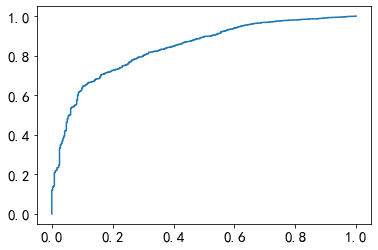

In [202]:
# Draw ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, y_pred_proba[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show()

# Results summary

In [108]:
perf_all.name = 'Model results'
perf_all

,Accuracy,Precision,Recall,F1,Auc
Logistic regression,0.874,0.992,0.878,0.931,0.777
Decision tree model,0.887,0.989,0.895,0.940,0.712
Random forest model,0.842,0.990,0.847,0.913,0.732
XGBoost model,0.932,0.986,0.954,0.970,0.666
